In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [4]:
df = pd.read_csv("Team4 Cleaned Data.csv")
regions = gpd.read_file('./Regions/Regions.shp')

In [5]:
df.dropna(subset = ['School Level','Rooms Total','TotalEnrol','Teachers Total'],inplace = True)
room_index = df[df['Rooms Total']==0.0].index
df.drop(index=room_index,inplace=True)

stud_index = df[df['TotalEnrol']==0.0].index
df.drop(index=stud_index,inplace=True)

teach_index = df[df['Teachers Total']==0.0].index
df.drop(index=teach_index,inplace=True)

moo_index = df[df['MOOE']==0.0].index
df.drop(index=moo_index,inplace=True)

In [6]:
#adding region shapefile
regions[['Region1','Region']] = regions['REGION'].str.split('(',1, expand=True)
regions = regions[['geometry','Region']]
regions['Region'] = regions['Region'].str.replace(')','').fillna('NCR')

<ipython-input-6-bc3ffbb0d5e4>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  regions['Region'] = regions['Region'].str.replace(')','').fillna('NCR')


In [7]:
#combining dataframes
df = pd.merge(df, regions, on='Region', how='left')

# EDA and Feature Engineering

In [8]:
#Creating Ratios

df['S:T'] = df['TotalEnrol'] / df['Teachers Total']
df['S:R'] = df['TotalEnrol'] / df['Rooms Total']

In [11]:
#creating groupings

df_groupings = df[['Region','SchoolType','School Level','DepEdClass','UrbanClass','Name','TotalEnrol','S:R','S:T','geometry']]
ratios = df_groupings.groupby( [ "Region", 'School Level'] )['S:R','S:T'].mean()
ratios['Schools'] = df_groupings.groupby( [ "Region",'School Level'] )['Name'].count()
ratios['Enrollees'] = df_groupings.groupby( [ "Region",'School Level'] )['TotalEnrol'].sum()
ratios['Enrol/School'] = ratios['Enrollees'] / ratios['Schools']
ratios.reset_index(inplace=True)

<ipython-input-11-cd7296ed078a>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ratios = df_groupings.groupby( [ "Region", 'School Level'] )['S:R','S:T'].mean()


<ipython-input-12-5faec104bd92>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  enrols = ratios.groupby('Region')['Enrollees','Schools'].sum()


Text(0, 0.5, 'Regions')

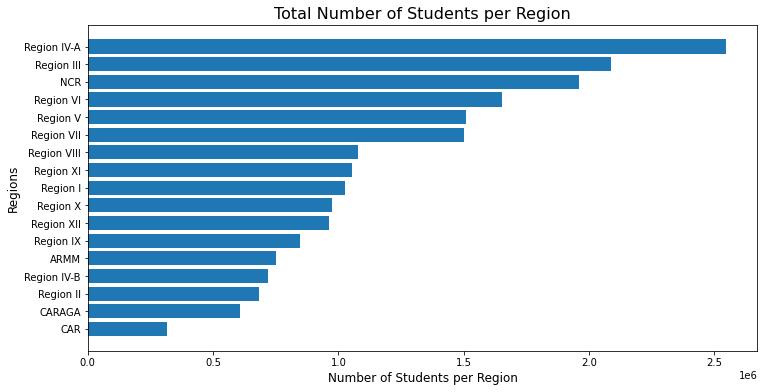

In [12]:
plt.figure(figsize=(12,6)) 
enrols = ratios.groupby('Region')['Enrollees','Schools'].sum()

x = enrols.sort_values(by='Enrollees', ascending=True)
y = enrols['Enrollees'].sort_values(ascending=True)

plt.barh(x.index, y) 

plt.title("Total Number of Students per Region", fontsize=16)
plt.xlabel("Number of Students per Region", fontsize=12)
plt.ylabel("Regions", fontsize=12)

plt.show()

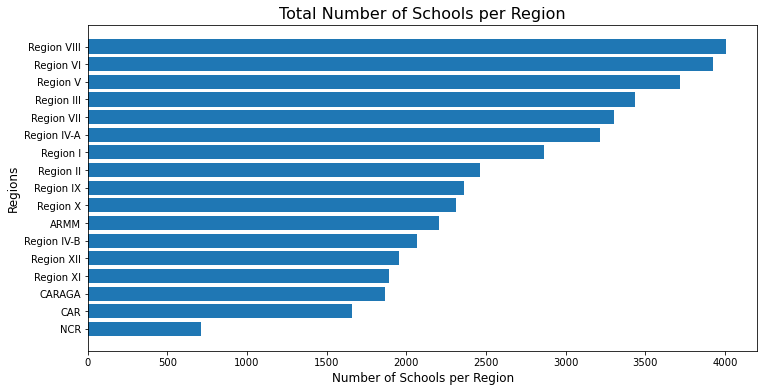

In [106]:
plt.figure(figsize=(12,6)) 

x = enrols.sort_values(by='Schools', ascending=True)
y = enrols['Schools'].sort_values(ascending=True)

plt.barh(x.index, y) 

plt.title("Total Number of Schools per Region", fontsize=16)
plt.xlabel("Number of Schools per Region", fontsize=12)
plt.ylabel("Regions", fontsize=12)

plt.show()

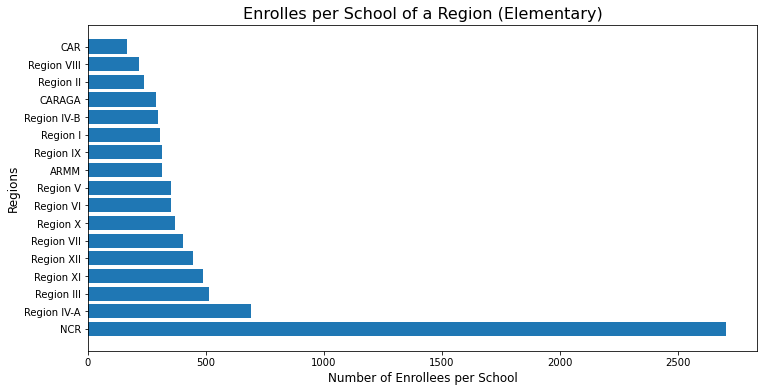

In [80]:
plt.figure(figsize=(12,6)) 

x = ratios[ratios['School Level']=='Elementary'].sort_values(by='Enrol/School', ascending=False)
y = ratios[ratios['School Level']=='Elementary']['Enrol/School'].sort_values(ascending=False)

plt.barh(x['Region'], y) 

plt.title("Enrolles per School of a Region (Elementary)", fontsize=16)
plt.xlabel("Number of Enrollees per School", fontsize=12)
plt.ylabel("Regions", fontsize=12)

plt.show()

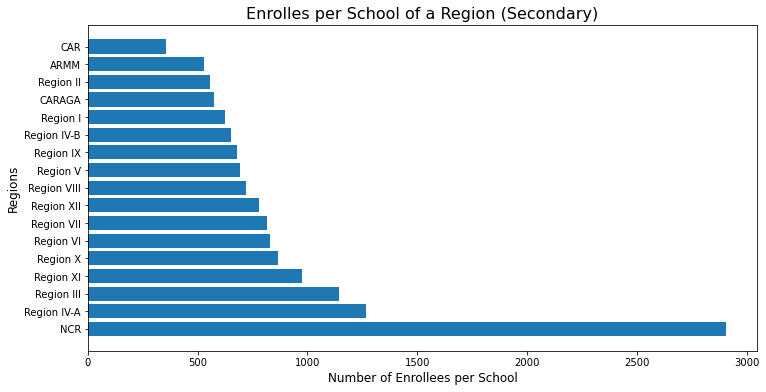

In [90]:
plt.figure(figsize=(12,6)) 

x = ratios[ratios['School Level']=='Secondary'].sort_values(by='Enrol/School', ascending=False)
y = ratios[ratios['School Level']=='Secondary']['Enrol/School'].sort_values(ascending=False)

plt.barh(x['Region'], y) 

plt.title("Enrolles per School of a Region (Secondary)", fontsize=16)
plt.xlabel("Number of Enrollees per School", fontsize=12)
plt.ylabel("Regions", fontsize=12)

plt.show()

In [84]:
#Getting top value for enrollees/school for all regions

ratios[ratios['School Level']=='Elementary'].sort_values(by='Enrol/School', ascending=False).head(1)
ratios[ratios['School Level']=='Secondary'].sort_values(by='Enrol/School', ascending=False).head(1)
#ES NCR = 2702; SS NCR = 2903


#Getting bottom value for enrollees/school for all regions

ratios[ratios['School Level']=='Elementary'].sort_values(by='Enrol/School', ascending=True).head(1)
ratios[ratios['School Level']=='Secondary'].sort_values(by='Enrol/School', ascending=True).head(1)
#ES CAR = 167; SS CAR = 357

,Region,School Level,S:R,S:T,Schools,Enrollees,Enrol/School
3,CAR,Secondary,43.943286,25.680374,214,76392.0,356.971963


In [334]:
ratios[ratios['School Level']=='Elementary'].sort_values(by='Enrollees', ascending=True).head(1)
#ratios[ratios['School Level']=='Secondary'].sort_values(by='Enrollees', ascending=True).head(1)

,Region,School Level,S:R,S:T,Schools,Enrollees,Enrol/School,Region_Code
0,CAR,Elementary,30.560114,28.19789,1443,240553.0,166.703396,13.0


In [211]:
#Getting top value for no. of schools

ratios[ratios['School Level']=='Elementary'].sort_values(by='Schools', ascending=False).head(1)
ratios[ratios['School Level']=='Secondary'].sort_values(by='Schools', ascending=False).head(1)
#ES Reg VIII = 3593; SS Reg V = 592


#Getting bottom value for enrollees/school for all regions

ratios[ratios['School Level']=='Elementary'].sort_values(by='Schools', ascending=True).head(1)
ratios[ratios['School Level']=='Secondary'].sort_values(by='Schools', ascending=True).head(1)
#ES NCR = 489; SS CAR = 214

,Region,School Level,S:R,S:T,Schools,Enrollees,Enrol/School
19,Region V,Secondary,54.954715,37.11505,592,410659.0,693.680743


In [202]:
#Getting top value for S:T ratio

ratios[ratios['School Level']=='Elementary'].sort_values(by='S:T', ascending=False).head(1)
ratios[ratios['School Level']=='Secondary'].sort_values(by='S:T', ascending=False).head(1)
#ES Reg XII = 49; SS Reg VII = 47

#Getting bottom value for S:T

ratios[ratios['School Level']=='Elementary'].sort_values(by='S:T', ascending=True).head(1)
ratios[ratios['School Level']=='Secondary'].sort_values(by='S:T', ascending=True).head(1)
#ES CAR = 28; SS CAR = 26

,Region,School Level,S:R,S:T,Schools,Enrollees,Enrol/School
30,Region XII,Elementary,51.1578,49.273274,1670,741071.0,443.75509


In [198]:
#Getting top value for S:R ratio

ratios[ratios['School Level']=='Elementary'].sort_values(by='S:R', ascending=False).head(1)
ratios[ratios['School Level']=='Secondary'].sort_values(by='S:R', ascending=False).head(1)
#ES NCR = 90; SS NCR = 93

#Getting bottom value for S:R

ratios[ratios['School Level']=='Elementary'].sort_values(by='S:R', ascending=True).head(1)
ratios[ratios['School Level']=='Secondary'].sort_values(by='S:R', ascending=True).head(1)
#ES CAR = 31; SS Reg II = 42

,Region,School Level,S:R,S:T,Schools,Enrollees,Enrol/School
5,NCR,Secondary,92.682365,31.109137,220,638685.0,2903.113636


# Visualizations

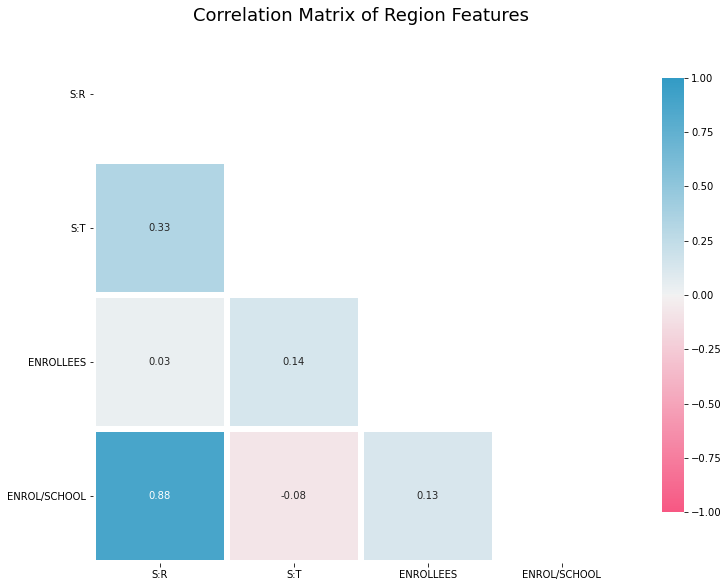

<Figure size 432x288 with 0 Axes>

In [89]:
corr_data = ratios[['S:R','S:T','Enrollees','Enrol/School']]
corr=corr_data.corr()

fig, ax = plt.subplots(figsize=(12, 10))# mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

title = 'Correlation Matrix of Region Features'
plt.title(title, loc='center', fontsize=18)
plt.show()

plt.savefig('Heatmap Main.png', dpi=400)

<ipython-input-13-14d86c694b44>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ratio_region = elems.groupby(['Region'])['S:R','S:T'].max()


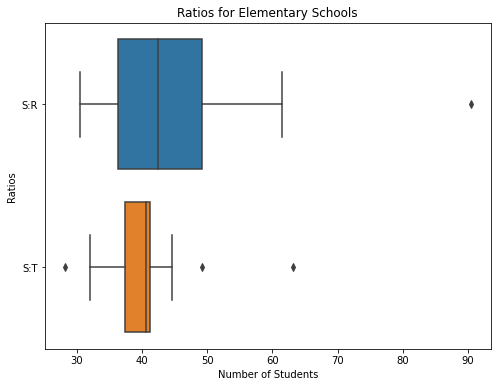

In [13]:
elems = ratios[ratios['School Level']=='Elementary']
sec = ratios[ratios['School Level']=='Secondary']

ratio_region = elems.groupby(['Region'])['S:R','S:T'].max()
melted = ratio_region.melt()

plt.figure(figsize=(8,6))

sns.boxplot(x='value', y='variable',data=melted)
sns.color_palette("mako") 
plt.ylabel("Ratios") 
plt.xlabel("Number of Students") 
plt.title('Ratios for Elementary Schools')

plt.show()

<ipython-input-14-7a6ee6b16378>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ratio_region = sec.groupby(['Region'])['S:R','S:T'].max()


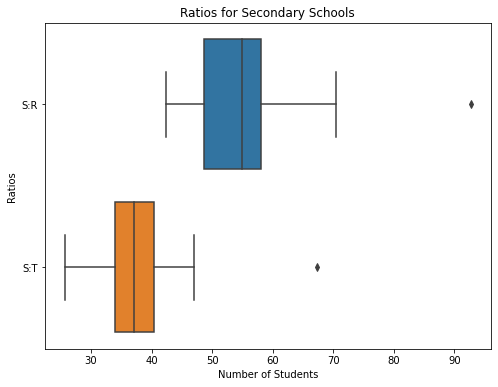

In [14]:
ratio_region = sec.groupby(['Region'])['S:R','S:T'].max()
melted = ratio_region.melt()

plt.figure(figsize=(8,6))

sns.boxplot(x='value', y='variable',data=melted)
sns.color_palette("mako") 
plt.ylabel("Ratios") 
plt.xlabel("Number of Students") 
plt.title('Ratios for Secondary Schools')

plt.show()

# Clustering - Elementary

In [21]:
df_schools = ratios.copy()
features_elem = elems[['S:R','S:T','Enrol/School']]

C:\Users\hbalcera\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[51.000000000000014, 23.585292273681073, 10.371584994081141, 4.670762990767204, 2.083202087961638, 1.3541137588137206, 0.9680597733313514, 0.7156023393920485, 0.4976297570752799, 0.3287649134148487, 0.23739258333610197, 0.18190180773694056, 0.11829165909927047, 0.06006664538831118, 0.029216043834964282]


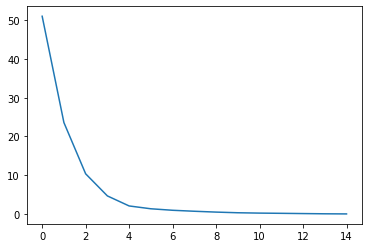

In [22]:
#For Elem Schools
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_ss_E = scaler.fit_transform(features_elem)

from sklearn.cluster import KMeans

ssd = []
range_n_clusters = list(np.arange(1,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(df_scaled_ss_E)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
print(ssd)
plt.plot(ssd)

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
range_n_clusters = list(np.arange(2,9))

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,random_state=42)
    kmeans.fit(df_scaled_ss_E)
    
    cluster_labels = kmeans.predict(df_scaled_ss_E)
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled_ss_E, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6995597308054966
For n_clusters=3, the silhouette score is 0.48228681863496814
For n_clusters=4, the silhouette score is 0.4216588195770694
For n_clusters=5, the silhouette score is 0.4355831365235864
For n_clusters=6, the silhouette score is 0.3946396289920615
For n_clusters=7, the silhouette score is 0.35425998123620933
For n_clusters=8, the silhouette score is 0.2711324645916151


In [27]:
kmeans = KMeans(n_clusters = 3,random_state=42)
kmeans.fit(df_scaled_ss_E)
cluster_labels = kmeans.predict(df_scaled_ss_E)   

elems['Cluster_Labels'] = cluster_labels
elems['Cluster_Labels'].value_counts()

<ipython-input-27-b5a0a9cb4ba1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elems['Cluster_Labels'] = cluster_labels


0    12
1     4
2     1
Name: Cluster_Labels, dtype: int64

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(features_elem)

df_minmax = pd.DataFrame(df_minmax, index=features_elem.index, columns=features_elem.columns)

df_minmax['Cluster_Labels'] = cluster_labels

df_clusters = df_minmax.set_index("Cluster_Labels")
df_clusters = df_clusters.groupby("Cluster_Labels").mean().reset_index()
df_clusters

,Cluster_Labels,S:R,S:T,Enrol/School
0,0,0.138569,0.265905,0.059651
1,1,0.403967,0.629472,0.125682
2,2,1.000000,0.354866,1.000000


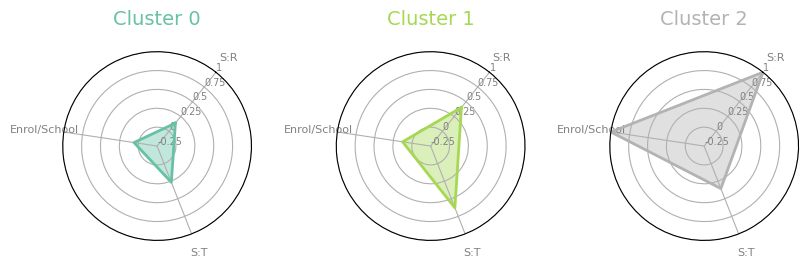

In [32]:
from math import pi
def make_spider(row, title, color):
 
    # number of variable
    categories=list(df_clusters)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3.5)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
#     plt.yticks([-2, -1, 0, 1, 2], [-2,-1, 0, 1, 2], color="grey", size=7) #for sscaled
#     plt.ylim(-2.5,2.5)
    plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
    plt.ylim(-0.25,1)

    # Ind1
    values=df_clusters.loc[row].drop('Cluster_Labels').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)
    

my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_clusters.index))

for row in range(0, len(df_clusters.index)):
    make_spider(row=row, 
                title='Cluster '+(df_clusters['Cluster_Labels'][row]).astype(str), 
                color=my_palette(row))
plt.savefig('ElemSchoolCluster.png', dpi=600)

In [39]:
latitude = {'ARMM':6.9568,'Region I': 16.0832, 'Region II': 16.9754, 'Region III': 15.4828,
           'Region IV-A': 14.1008, 'Region IV-B': 9.8432, 'Region V': 13.4210,
           'Region VI': 11.0050, 'Region VII': 9.8169, 'Region VIII': 12.2446,
           'Region IX': 8.1541, 'Region X': 8.0202, 'Region XI': 7.3042,
           'Region XII': 6.2707, 'CAR': 17.3513, 'CARAGA': 8.8015, 'NCR': 14.6091}

lat = pd.DataFrame(list(latitude.items()), columns = ['Region','Latitude'])

longitude = {'ARMM':124.2422, 'Region I': 120.6200, 'Region II': 121.8107, 'Region III': 120.7120,
           'Region IV-A': 121.0794, 'Region IV-B': 118.7365, 'Region V': 123.4137,
           'Region VI': 122.5373, 'Region VII': 124.0641, 'Region VIII': 125.0388,
           'Region IX': 123.2588, 'Region X': 124.6857, 'Region XI': 126.0893,
           'Region XII': 124.6857, 'CAR': 121.1719, 'CARAGA': 125.7407, 'NCR': 121.0223}

lon = pd.DataFrame(list(longitude.items()), columns = ['Region','Longitude'])

latdf = pd.merge(elems, lat, on='Region')
complete_elems = pd.merge(latdf, lon, on='Region')
complete_elems

,Region,School Level,S:R,S:T,Schools,Enrollees,Enrol/School,Cluster_Labels,Latitude,Longitude
0,ARMM,Elementary,61.438280,63.216140,1950,616228.0,316.014359,1,6.9568,124.2422
1,CAR,Elementary,30.560114,28.197890,1443,240553.0,166.703396,0,17.3513,121.1719
2,CARAGA,Elementary,43.551067,40.927173,1610,462294.0,287.139130,0,8.8015,125.7407
3,NCR,Elementary,90.384265,40.624675,489,1321449.0,2702.349693,2,14.6091,121.0223
4,Region I,Elementary,34.419503,32.027252,2377,724182.0,304.662179,0,16.0832,120.6200
5,Region II,Elementary,32.777022,34.205760,2139,505344.0,236.252454,0,16.9754,121.8107
6,Region III,Elementary,42.409971,40.681058,2931,1509749.0,515.096895,0,15.4828,120.7120
7,Region IV-A,Elementary,57.114752,43.909181,2665,1843622.0,691.790619,1,14.1008,121.0794
8,Region IV-B,Elementary,41.727658,41.299740,1777,526646.0,296.368036,0,9.8432,118.7365
9,Region IX,Elementary,38.057616,39.612809,2068,650670.0,314.637331,0,8.1541,123.2588


In [40]:
cluster0 = complete_elems[complete_elems['Cluster_Labels'] == 0]
cluster1 = complete_elems[complete_elems['Cluster_Labels'] == 1]
cluster2 = complete_elems[complete_elems['Cluster_Labels'] == 2]

import folium
map_center = [12.8797, 121.7740]
cluster0map = folium.Map(height=700, width=1000, tiles="OpenStreetMap", 
                         zoom_start=20, mapcenter=map_center)

for i in np.arange(len(cluster0)):
    lats = cluster0["Latitude"].values[i]
    lons = cluster0["Longitude"].values[i] 
    name = cluster0["Region"].values[i]
    folium.Marker([lats, lons], popup=cluster1['Region']).add_to(cluster0map)
    
cluster0map

In [ ]:
cluster0 = completedf[completedf['Cluster_Labels'] == 0]
cluster1 = completedf[completedf['Cluster_Labels'] == 1]
cluster2 = completedf[completedf['Cluster_Labels'] == 2]

import folium
map_center = [14.583197, 121.051538]
cluster1map = folium.Map(height=700, width=1000, tiles="OpenStreetMap", 
                         zoom_start=20, mapcenter=map_center)

for i in np.arange(len(cluster1)):
    lats = cluster1["Latitude"].values[i]
    lons = cluster1["Longitude"].values[i] 
    name = cluster1["Region"].values[i]
    folium.Marker([lats, lons], popup=cluster1['Region']).add_to(cluster1map)
    
cluster1map

In [ ]:
cluster0 = completedf[completedf['Cluster_Labels'] == 0]
cluster1 = completedf[completedf['Cluster_Labels'] == 1]
cluster2 = completedf[completedf['Cluster_Labels'] == 2]

import folium

cluster2map = folium.Map(height=700, width=1000, tiles="OpenStreetMap", 
                         zoom_start=20, mapcenter=(12.8797, 121.7740))

for i in np.arange(len(cluster2)):
    lats = cluster2["Latitude"].values[i]
    lons = cluster2["Longitude"].values[i] 
    name = cluster2["Region"].values[i]
    folium.Marker([lats, lons], popup=cluster1['Region']).add_to(cluster2map)
    
cluster2map

# Clustering - Secondary

C:\Users\hbalcera\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2.461853543363372, 1.2124033509304983, 0.5872167654387179, 0.22890252670849598, 0.13206114950911232, 0.09182129777706954, 0.064954783470483, 0.044755211295503965, 0.03511475789805465, 0.02666234946251084, 0.020377484377672353, 0.014006608541493876, 0.00878999798081211, 0.004511450685776117, 0.0026703333016762612]


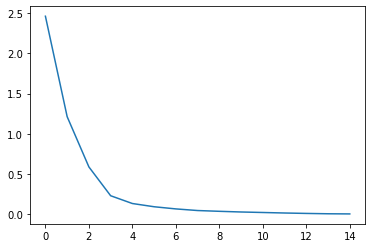

In [41]:
features_sec = sec[['S:R','S:T','Enrol/School']]
df_scaled_ss_S = scaler.fit_transform(features_sec)

from sklearn.cluster import KMeans

ssd = []
range_n_clusters = list(np.arange(1,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(df_scaled_ss_S)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
print(ssd)
plt.plot(ssd)

In [44]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
range_n_clusters = list(np.arange(2,9))

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,random_state=42)
    kmeans.fit(df_scaled_ss_S)
    
    cluster_labels = kmeans.predict(df_scaled_ss_S)
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled_ss_E, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6995597308054966
For n_clusters=3, the silhouette score is 0.5939559308570055
For n_clusters=4, the silhouette score is 0.26296057082814334
For n_clusters=5, the silhouette score is 0.13905842762195958
For n_clusters=6, the silhouette score is 0.018443335123495136
For n_clusters=7, the silhouette score is -0.026742911365459553
For n_clusters=8, the silhouette score is -0.128646048083859


In [46]:
kmeans = KMeans(n_clusters = 3,random_state=42)
kmeans.fit(df_scaled_ss_S)
cluster_labels = kmeans.predict(df_scaled_ss_S)   

sec['Cluster_Labels'] = cluster_labels
sec['Cluster_Labels'].value_counts()

<ipython-input-46-42ff3c2640af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec['Cluster_Labels'] = cluster_labels


0    15
1     1
2     1
Name: Cluster_Labels, dtype: int64

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(features_sec)

df_minmax = pd.DataFrame(df_minmax, index=features_sec.index, columns=features_sec.columns)

df_minmax['Cluster_Labels'] = cluster_labels

df_clusters = df_minmax.set_index("Cluster_Labels")
df_clusters = df_clusters.groupby("Cluster_Labels").mean().reset_index()
df_clusters

,Cluster_Labels,S:R,S:T,Enrol/School
0,0,0.215426,0.265118,0.161646
1,1,1.000000,0.130569,1.000000
2,2,0.559084,1.000000,0.068303


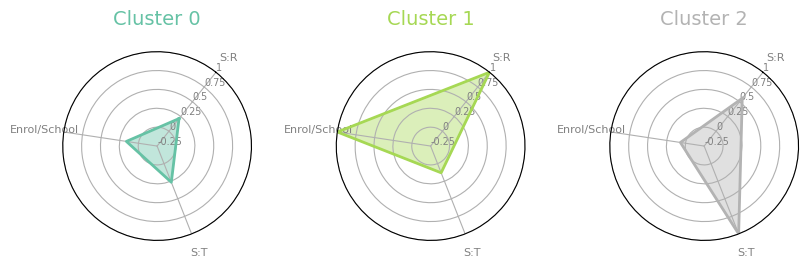

In [49]:
from math import pi
def make_spider(row, title, color):
 
    # number of variable
    categories=list(df_clusters)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3.5)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
#     plt.yticks([-2, -1, 0, 1, 2], [-2,-1, 0, 1, 2], color="grey", size=7) #for sscaled
#     plt.ylim(-2.5,2.5)
    plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
    plt.ylim(-0.25,1)

    # Ind1
    values=df_clusters.loc[row].drop('Cluster_Labels').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)
    
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_clusters.index))

for row in range(0, len(df_clusters.index)):
    make_spider(row=row, 
                title='Cluster '+(df_clusters['Cluster_Labels'][row]).astype(str), 
                color=my_palette(row))
    
plt.savefig('SecondarySchoolCluster.png', dpi=600)

In [50]:
latdf = pd.merge(sec, lat, on='Region')
complete_sec = pd.merge(latdf, lon, on='Region')
complete_sec

,Region,School Level,S:R,S:T,Schools,Enrollees,Enrol/School,Cluster_Labels,Latitude,Longitude
0,ARMM,Secondary,70.497011,67.258266,252,133782.0,530.880952,2,6.9568,124.2422
1,CAR,Secondary,43.943286,25.680374,214,76392.0,356.971963,0,17.3513,121.1719
2,CARAGA,Secondary,52.140067,33.889101,253,145232.0,574.039526,0,8.8015,125.7407
3,NCR,Secondary,92.682365,31.109137,220,638685.0,2903.113636,1,14.6091,121.0223
4,Region I,Secondary,48.725785,34.835986,485,302841.0,624.414433,0,16.0832,120.6200
5,Region II,Secondary,42.365892,29.649951,321,178326.0,555.532710,0,16.9754,121.8107
6,Region III,Secondary,57.631917,40.426701,504,575743.0,1142.347222,0,15.4828,120.7120
7,Region IV-A,Secondary,65.744922,41.895032,553,700533.0,1266.786618,0,14.1008,121.0794
8,Region IV-B,Secondary,51.240689,34.973602,291,190214.0,653.656357,0,9.8432,118.7365
9,Region IX,Secondary,47.971875,37.124855,292,197696.0,677.041096,0,8.1541,123.2588


In [52]:
cluster0 = complete_sec[complete_sec['Cluster_Labels'] == 0]
cluster1 = complete_sec[complete_sec['Cluster_Labels'] == 1]
cluster2 = complete_sec[complete_sec['Cluster_Labels'] == 2]

import folium

cluster0map = folium.Map(height=700, width=1000, tiles="OpenStreetMap", 
                         zoom_start=20, mapcenter=(12.8797, 121.7740))

for i in np.arange(len(cluster0)):
    lats = cluster0["Latitude"].values[i]
    lons = cluster0["Longitude"].values[i] 
    name = cluster0["Region"].values[i]
    folium.Marker([lats, lons], popup=cluster1['Region']).add_to(cluster0map)
    
cluster0map

In [53]:
map_center = [14.583197, 121.051538]
cluster1map = folium.Map(height=700, width=1000, tiles="OpenStreetMap", 
                         zoom_start=20, mapcenter=map_center)

for i in np.arange(len(cluster1)):
    lats = cluster1["Latitude"].values[i]
    lons = cluster1["Longitude"].values[i] 
    name = cluster1["Region"].values[i]
    folium.Marker([lats, lons], popup=cluster1['Region']).add_to(cluster1map)
    
cluster1map

In [54]:
cluster2map = folium.Map(height=700, width=1000, tiles="OpenStreetMap", 
                         zoom_start=20, mapcenter=(12.8797, 121.7740))

for i in np.arange(len(cluster2)):
    lats = cluster2["Latitude"].values[i]
    lons = cluster2["Longitude"].values[i] 
    name = cluster2["Region"].values[i]
    folium.Marker([lats, lons], popup=cluster1['Region']).add_to(cluster2map)
    
cluster2map